In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exercise 3.2

3.2 Task - 1: Implementation of MCP Neurons:
1. Design a MCP Neuron for ”AND” Boolean Functions and ”OR” Boolean Functions with two
inputs:
Hint:

• Aggregate all the inputs.

• Handcraft a Threshold values for ”AND” and ”OR” Function.

• Implement a if else statement as stated above.
You may use code base provided below or write your own code from scratch:


In [8]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with MCP Neuron for two inputs.

    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.

    Outputs:
    state_neuron (1D list): A state of neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)

    # Create an empty list to store the state of the neuron
    state_neuron = []

    # Iterate through the binary input arrays
    for x1, x2 in zip(X1, X2):
        # Perform element-wise addition and check against the threshold
        if (x1 + x2) >= T:
            state_neuron.append(1)  # Active state
        else:
            state_neuron.append(0)  # Inactive state

    return state_neuron


Sample Usage for ”AND” Function.

In [9]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2 # Threshold value
# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)
# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


For ”OR” Operations.

In [10]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.

    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.

    Outputs:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)

    # Create an empty list to store the state of the neuron
    state_neuron = []

    # Iterate through the binary input arrays
    for x1, x2 in zip(X1, X2):
        # Perform element-wise addition and check against the threshold
        if (x1 + x2) >= T:
            state_neuron.append(1)  # Active state
        else:
            state_neuron.append(0)  # Inactive state

    return state_neuron


Sample Usage for ”OR” Function.

In [11]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1 # Threshold value for OR gate
# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)
# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


## 3.2.1 Answer the Following Question:

• Question - 1: List out all the limitations of MCP - Neurons.

answer: Here’s a list of limitations of MCP Neurons:


*  Binary output only.
*   Inability to learn
*  Inability to learn.
*   Limited representation power (cannot solve non-linear problems like XOR).
*  Lack of dynamics (cannot handle temporal or sequential data).
*   No error tolerance for noisy or imperfect data.
*   Single layer restriction.
*  Fixed activation function (step function, no diversity).


















Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.

{Can you devise a if else rules.}

Answer:
To solve the XOR function using MCP Neurons, here's what I would do: I’d start by taking two binary inputs, `X1` and `X2`. First, I’d compute the AND gate output, let’s call it `A`, by checking if both inputs are `1`. At the same time, I’d calculate the OR gate output, `B`, which checks if at least one input is `1`. Then, I’d negate the AND output to get `NOT A`, which we’ll call `C`. Finally, I’d combine the outputs of `B` and `C` using an AND gate to produce the XOR output. By layering these logical operations, I’d be able to replicate the XOR function, even though a single MCP Neuron can't handle non-linear functions like XOR. It’s like building the answer step by step!


loading the Dataset

In [12]:
import pandas as pd
import numpy as np
# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI&ML -level6/WorkShops/mnist_3_and_5.csv") # Add the correct file path if necessary
# Extract features and labels
X = df_0_1.drop(columns=["label"]).values # 784 pixels
y = df_0_1["label"].values # Labels (0 or 1)
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


1. Question - 1: What does the shape of X represent?

answer: The shape of X is (12665, 784). This indicates that the feature matrix X consists of:

12665 samples (rows): Each row corresponds to an individual data sample (e.g., an image).

784 features (columns): Each column corresponds to a pixel value in the flattened 28x28 grayscale image (28x28 = 784 pixels).

2. Question - 2: What does the shape of Y represent?


Answer: The shape of y is (12665,). This indicates:

12665 elements in total: Each element corresponds to the label or target value for a specific sample in the dataset.

It's a 1D array (vector): Each label represents the class (e.g., 0 or 1) of the corresponding sample from the feature matrix X.

Visualize the Dataset:

Error: Not enough images in images_0 or images_1 to plot 5 images.


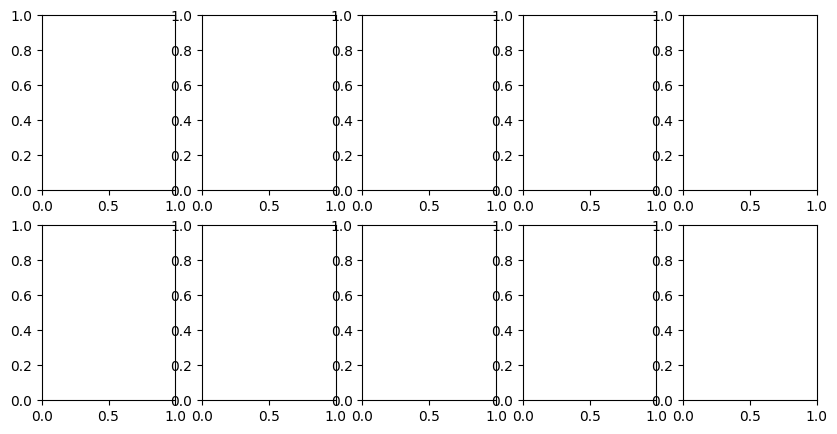

In [13]:
import matplotlib.pyplot as plt

# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")

        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")

    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()


3. Initialize Weights and Bias:

In [14]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Answer the Following Question:

Question - 3: What does the weights array represent in this context?

Answer: The weights array represents the model's parameters, with each element corresponding to the importance of a specific input feature (e.g., a pixel in an image). These weights determine how much influence each feature has on the model's predictions.

Question - 4: Why are we initializing the weights to zero? What effect could this
have on the training process?

Answer:Initializing the weights to zero provides a simple starting point, where all features are treated equally. However, this can lead to a symmetry problem in complex models like neural networks, slowing down learning since all nodes may update in the same way.

4. Implement a Decision Function or Activation Function:

In [15]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training
    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    # Compute linear combination of inputs and weights
    predictions = np.dot(X, weights) + bias

    # Activation function (Step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all


5. Implement the Perceptron Learning Algorithm:

In [16]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):

    n_samples = X.shape[0]

    for epoch in range(epochs):
        # Initialize variables to track performance
        correct_predictions = 0

        for i in range(n_samples):
            # Compute the perceptron output
            output = np.dot(X[i], weights) + bias

            # Use step function as the activation function
            prediction = 1 if output >= 0 else 0

            # Check if the prediction is correct
            if prediction == y[i]:
                correct_predictions += 1
            else:
                # Update weights and bias for misclassified samples
                error = y[i] - prediction
                weights += learning_rate * error * X[i]
                bias += learning_rate * error

        # Print progress at each epoch
        accuracy = correct_predictions / n_samples * 100
        print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.2f}%")

    return weights, bias, accuracy


Answer the Following Question:


Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

Answer: The line output = np.dot(X[i], weights) + bias computes the perceptron's decision boundary. It calculates the weighted sum of the input features X[i] with the weights, and then adds the bias to shift this boundary.

Question - 6: What happens when the prediction is wrong? How are the weights and bias updated?

Answer: When the prediction is wrong, the weights and bias are updated to minimize the error.

Question - 7:Why is the final accuracy important, and what do you expect it to be?

Answer: The final accuracy measures how well the perceptron has learned to classify the input data. It is crucial because it indicates the model's performance on the training data. For a linearly separable dataset, the accuracy is expected to reach 100%, as the perceptron can perfectly classify such data after sufficient training.

Answer the Following Question:

 Question - 8:What does misclassified idx store, and how is it used in this code?

 Answer: misclassified_idx typically stores the indices of data samples that were incorrectly classified during the perceptron training process. In the code, it could be used to identify these specific samples, allowing for analysis or visualization

 Question - 9: How do you interpret the result if the output is ”All images were
correctly classified!”?

Answer: f the output is "All images were correctly classified!" it means that the model's predictions for the entire dataset match the true labels perfectly. This indicates the perceptron has successfully learned the decision boundary for the given task, assuming the data is linearly separable.

In [17]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 0.00%
Epoch 2/100 - Accuracy: 0.00%
Epoch 3/100 - Accuracy: 0.00%
Epoch 4/100 - Accuracy: 0.00%
Epoch 5/100 - Accuracy: 0.00%
Epoch 6/100 - Accuracy: 0.00%
Epoch 7/100 - Accuracy: 0.00%
Epoch 8/100 - Accuracy: 0.00%
Epoch 9/100 - Accuracy: 0.00%
Epoch 10/100 - Accuracy: 0.00%
Epoch 11/100 - Accuracy: 0.00%
Epoch 12/100 - Accuracy: 0.00%
Epoch 13/100 - Accuracy: 0.00%
Epoch 14/100 - Accuracy: 0.00%
Epoch 15/100 - Accuracy: 0.00%
Epoch 16/100 - Accuracy: 0.00%
Epoch 17/100 - Accuracy: 0.00%
Epoch 18/100 - Accuracy: 0.00%
Epoch 19/100 - Accuracy: 0.00%
Epoch 20/100 - Accuracy: 0.00%
Epoch 21/100 - Accuracy: 0.00%
Epoch 22/100 - Accuracy: 0.00%
Epoch 23/100 - Accuracy: 0.00%
Epoch 24/100 - Accuracy: 0.00%
Epoch 25/100 - Accuracy: 0.00%
Epoch 26/100 - Accuracy: 0.00%
Epoch 27/100 - Accuracy: 0.00%
Epoch 28/100 - Accuracy: 0.00%
Epoch 29/100 - Accuracy: 0.00%
Epoch 30/100 - Accuracy: 0.00%
Epoch 31/100 - Accuracy: 0.00%
Epoch 32/100 - Accuracy: 0.00%
Epoch 33/100 - Ac

Visualizing the Misclassified Image:

Final Accuracy: 0.0000


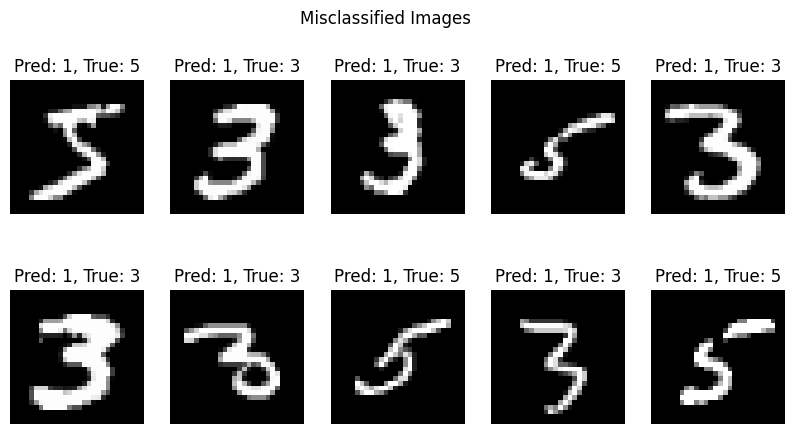

In [18]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
  fig, axes = plt.subplots(2, 5, figsize=(10, 5))
  for ax, idx in zip(axes.flat, misclassified_idx[:10]): # Show 10 misclassified images
    ax.imshow(X[idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
    ax.axis("off")
  plt.suptitle("Misclassified Images")
  plt.show()
else:
  print("All images were correctly classified!")

# 4.4 Task 3: Perceptron Algorithm for 3 vs 5 Classification.

1. Objective:
In this exercise, you will implement a Perceptron learning algorithm for binary classification using the
MNIST dataset. Specifically, you will classify the digits 3 and 5. After completing the Perceptron
algorithm, you will evaluate the model’s performance and visualize misclassified images.
Dataset: mnist_3_and_5.csv

2. To - Do:

 Implement each Step as we implemented above.

 Visualize the final misclassified images and Provide your conclusion.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Load MNIST dataset containing only 3s and 5s
data = pd.read_csv("/content/drive/MyDrive/AI&ML -level6/WorkShops/mnist_3_and_5.csv")  # Make sure to provide the correct file path
data.shape

(2741, 785)

Epoch 1/100 - Accuracy: 91.57%
Epoch 2/100 - Accuracy: 93.72%
Epoch 3/100 - Accuracy: 94.16%
Epoch 4/100 - Accuracy: 94.75%
Epoch 5/100 - Accuracy: 94.89%
Epoch 6/100 - Accuracy: 95.04%
Epoch 7/100 - Accuracy: 95.99%
Epoch 8/100 - Accuracy: 95.59%
Epoch 9/100 - Accuracy: 95.40%
Epoch 10/100 - Accuracy: 95.66%
Epoch 11/100 - Accuracy: 95.99%
Epoch 12/100 - Accuracy: 95.80%
Epoch 13/100 - Accuracy: 96.57%
Epoch 14/100 - Accuracy: 96.02%
Epoch 15/100 - Accuracy: 96.35%
Epoch 16/100 - Accuracy: 96.57%
Epoch 17/100 - Accuracy: 96.06%
Epoch 18/100 - Accuracy: 96.24%
Epoch 19/100 - Accuracy: 96.10%
Epoch 20/100 - Accuracy: 96.61%
Epoch 21/100 - Accuracy: 97.01%
Epoch 22/100 - Accuracy: 96.90%
Epoch 23/100 - Accuracy: 97.30%
Epoch 24/100 - Accuracy: 96.83%
Epoch 25/100 - Accuracy: 96.50%
Epoch 26/100 - Accuracy: 97.15%
Epoch 27/100 - Accuracy: 97.34%
Epoch 28/100 - Accuracy: 96.94%
Epoch 29/100 - Accuracy: 97.15%
Epoch 30/100 - Accuracy: 97.26%
Epoch 31/100 - Accuracy: 96.68%
Epoch 32/100 - Ac

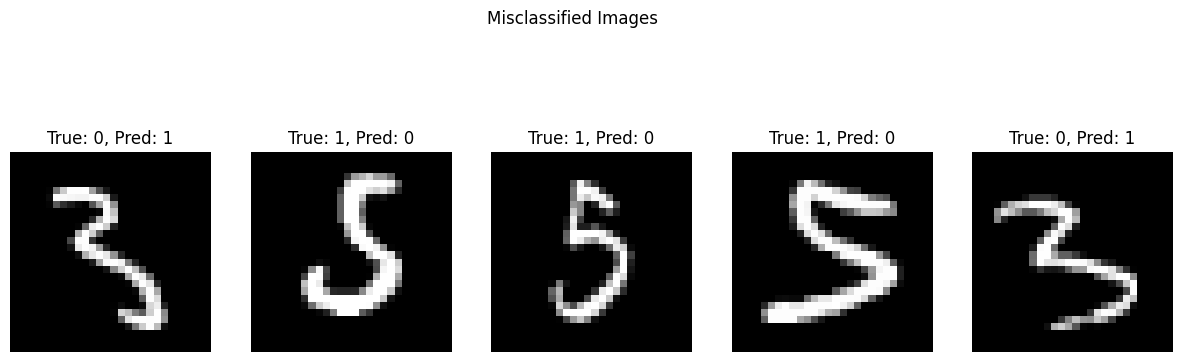

In [21]:
# Separate features and labels
X = data.drop(columns=["label"]).values  # Features (flattened 28x28 images)
y = data["label"].values  # Labels (3 or 5)

# Convert labels to binary: 3 -> 0 and 5 -> 1
y = np.where(y == 3, 0, 1)

# Initialize weights and bias
weights = np.zeros(X.shape[1])  # One weight for each pixel
bias = 0
learning_rate = 0.1
epochs = 100

# Define activation function (Step Function)
def decision_function(X, weights, bias):
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)

# Train the perceptron
def train_perceptron(X, y, weights, bias, learning_rate, epochs):
    n_samples = X.shape[0]
    for epoch in range(epochs):
        correct_predictions = 0
        for i in range(n_samples):
            # Compute prediction
            output = np.dot(X[i], weights) + bias
            prediction = 1 if output >= 0 else 0

            # Check if prediction is correct
            if prediction == y[i]:
                correct_predictions += 1
            else:
                # Update weights and bias for misclassified samples
                error = y[i] - prediction
                weights += learning_rate * error * X[i]
                bias += learning_rate * error

        accuracy = correct_predictions / n_samples * 100
        print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.2f}%")
    return weights, bias

# Train the model
weights, bias = train_perceptron(X, y, weights, bias, learning_rate, epochs)

# Evaluate the model
y_pred = decision_function(X, weights, bias)
accuracy = np.mean(y_pred == y) * 100
print(f"Final Accuracy on Training Data: {accuracy:.2f}%")

# Identify misclassified indices
misclassified_idx = np.where(y_pred != y)[0]

# Visualize misclassified images
if len(misclassified_idx) > 0:
    print(f"Number of Misclassified Images: {len(misclassified_idx)}")
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, ax in enumerate(axes):
        if i >= len(misclassified_idx):  # If fewer than 5 misclassified images
            break
        idx = misclassified_idx[i]
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"True: {y[idx]}, Pred: {y_pred[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")
